In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
%matplotlib inline
import scipy.stats as sts
from scipy.misc import derivative

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = [[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
            [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
            [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
            [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
            [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
            [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
            [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
            [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
            [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
            [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]]

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

***Решение***

In [3]:
def cosine(a, b):
    a_length = np.linalg.norm(a)
    b_length = np.linalg.norm(b)
    
    return np.dot(a, b) / (a_length * b_length)

In [4]:
for i in range (len(raitings)):   

    dist = [cosine (raitings[i],raitings[j]) for j in range (len(raitings))]

    d = list(enumerate(dist, 1))

    d.sort (key = lambda i: i[1], reverse = True)

    user_pair = i + 1, d[1][0] #создаем пару из наиболее похожих пользователей
    
    print(user_pair)

(1, 9)
(2, 5)
(3, 10)
(4, 10)
(5, 9)
(6, 10)
(7, 4)
(8, 6)
(9, 1)
(10, 3)


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

***Решение***

In [5]:
ratings = np.array (raitings) 

user, elem_a, sing_elem = np.linalg.svd(ratings)

zero_m = np.zeros((ratings.shape[0], ratings.shape[1]))

zero_m[:zero_m.shape[0], :zero_m.shape[0]] = np.diag(elem_a)

component = 5
zero_m = zero_m[:, :component]
sing_elem = sing_elem[:component, :]

five_p = user.dot(zero_m)

print(five_p)

[[-23.41982063   5.36092136   3.83196779  -4.06950174   1.10267269]
 [-24.76774917  -4.52188701   1.35815965   1.58128545   8.59912002]
 [-22.27728589   6.96492049  -4.84461485  -0.47661647   3.37152266]
 [-19.4257757   -2.64575227  -6.86014009  -4.76604765   1.96075707]
 [-22.8146354   -0.51464093   7.70180188   4.42379773   1.29124163]
 [-21.76961656  -1.94294987  -4.56934779   8.32306487  -2.21887359]
 [-21.23427453  -9.78047778   1.16340271  -4.86074521  -2.60815471]
 [-19.97476815  -4.00048677  -1.67456316   1.1512346   -3.5637169 ]
 [-26.39306998   3.03090482   5.86422753  -1.67503491  -3.71500141]
 [-29.94016844   4.82012297  -3.48912415   0.05527083  -3.62526487]]


## Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

***Решение***

In [6]:
def f(x):
    return (np.tan (np.sin(x) + np.cos (2*x + 3)))**2

print(f'Производная в точке х0 = 1: {derivative(f, 1.0, dx=1e-6, n=1)}')

Производная в точке х0 = 1: 55.3859176464222


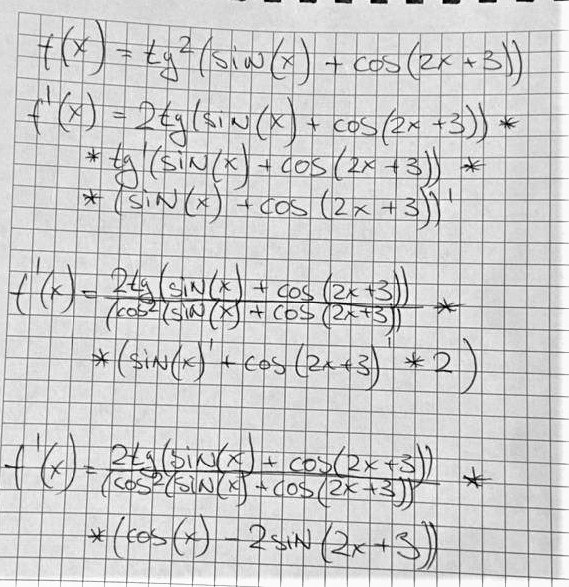

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [7]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [8]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [9]:
fx = np.array([0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092])

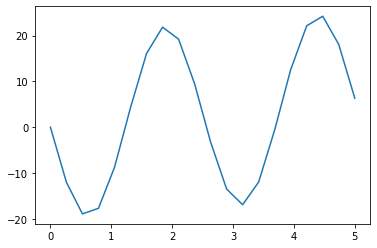

In [10]:
plt.plot(x, fx)
plt.show()

In [11]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

***Решение***

In [13]:
params = [2, -2]
optim = minimize(error, params, method='nelder-mead', options={'xtol': 1e-6, 'disp': True})
optim.x

Optimization terminated successfully.
         Current function value: 0.000106
         Iterations: 57
         Function evaluations: 108


array([ 3.00000022, -2.50000014])

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

***Решение***

In [14]:
random = sts.poisson(20)
rndm = random.rvs(size=1000, random_state=50)

In [15]:
np.unique(rndm)

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35])

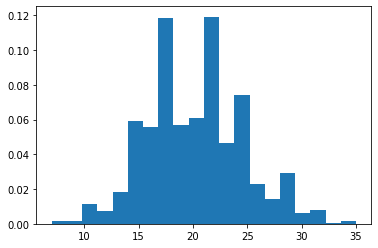

In [16]:
x = np.linspace(0,2,100)
plt.hist(rndm, density=True, bins=20)
plt.show()

In [18]:
size = 50 
samples_count = 1000

average = np.array([])

for number in range (samples_count):
    sample = random.rvs(size=size)
    average = np.append(average, sample.mean())

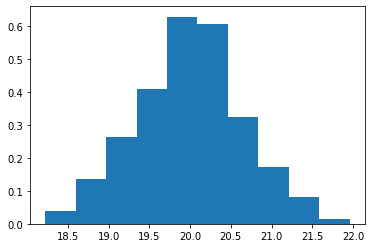

In [20]:
plt.hist(average, density=True)
plt.show()

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],  
 [1, 1]]

***Решение***

In [21]:
matrix = np.array([[1, -4],
              [1, 1]])
print(matrix)

[[ 1 -4]
 [ 1  1]]


In [22]:
value, vectors = np.linalg.eig(matrix)

print(f'Собственные значения: {value} \n\nCобственные векторы матрицы: {vectors}')

Собственные значения: [1.+2.j 1.-2.j] 

Cобственные векторы матрицы: [[0.89442719+0.j        0.89442719-0.j       ]
 [0.        -0.4472136j 0.        +0.4472136j]]


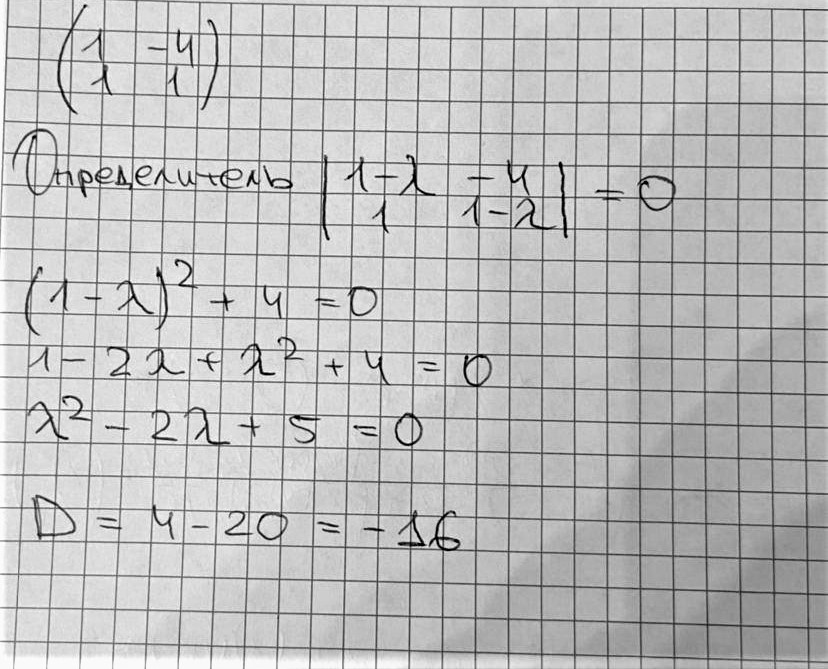